# Importing Libraries

In [351]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Loading Dataset

In [352]:
data = pd.read_csv('/content/Bank_customers_data.csv')

In [353]:
data.head()

,Unnamed: 0,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance,loan,score,loan_eligibility
0,0,100000001,Simon,Walsh,Male,21,England,White Collar,05.Jan.15,113810.15,5252.0,644.0,2276203.00
1,1,400000002,Jasmine,Miller,Female,34,Northern Ireland,Blue Collar,06.Jan.15,36919.73,8907.0,697.0,0.00
2,2,100000003,Liam,Brown,Male,46,England,White Collar,07.Jan.15,101536.83,2162.0,617.0,2030736.60
3,3,300000004,Trevor,Parr,Male,32,Wales,White Collar,08.Jan.15,1421.52,7277.0,672.0,0.00
4,4,100000005,Deirdre,Pullman,Female,38,England,Blue Collar,09.Jan.15,35639.79,2586.0,405.0,178198.95


In [354]:
data.shape

(4014, 13)

# Exploratory Data Analysis

In [355]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4014 entries, 0 to 4013
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          4014 non-null   int64  
 1   Customer ID         4014 non-null   int64  
 2   Name                4014 non-null   object 
 3   Surname             4014 non-null   object 
 4   Gender              4014 non-null   object 
 5   Age                 4014 non-null   int64  
 6   Region              4014 non-null   object 
 7   Job Classification  4014 non-null   object 
 8   Date Joined         4014 non-null   object 
 9   Balance             4014 non-null   float64
 10  loan                4014 non-null   float64
 11  score               4014 non-null   float64
 12  loan_eligibility    4014 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 407.8+ KB


In [356]:
data.duplicated().sum() # There is no duplicate value

0

In [357]:
#There is no importance of first column i.e Unnamed : 0 so i droped it.
data.drop('Unnamed: 0',axis = 1,inplace = True)

In [358]:
data.shape

(4014, 12)

In [359]:
#Here Customer Id is more important and unique that customer name and surname so i supposed to drop it.
data.drop(['Name','Surname'],axis = 1, inplace = True)

In [360]:
#rest columns are
data.columns

Index(['Customer ID', 'Gender', 'Age', 'Region', 'Job Classification',
       'Date Joined', 'Balance', 'loan', 'score', 'loan_eligibility'],
      dtype='object')

# Univariate Analysis

<Axes: xlabel='loan_eligibility'>

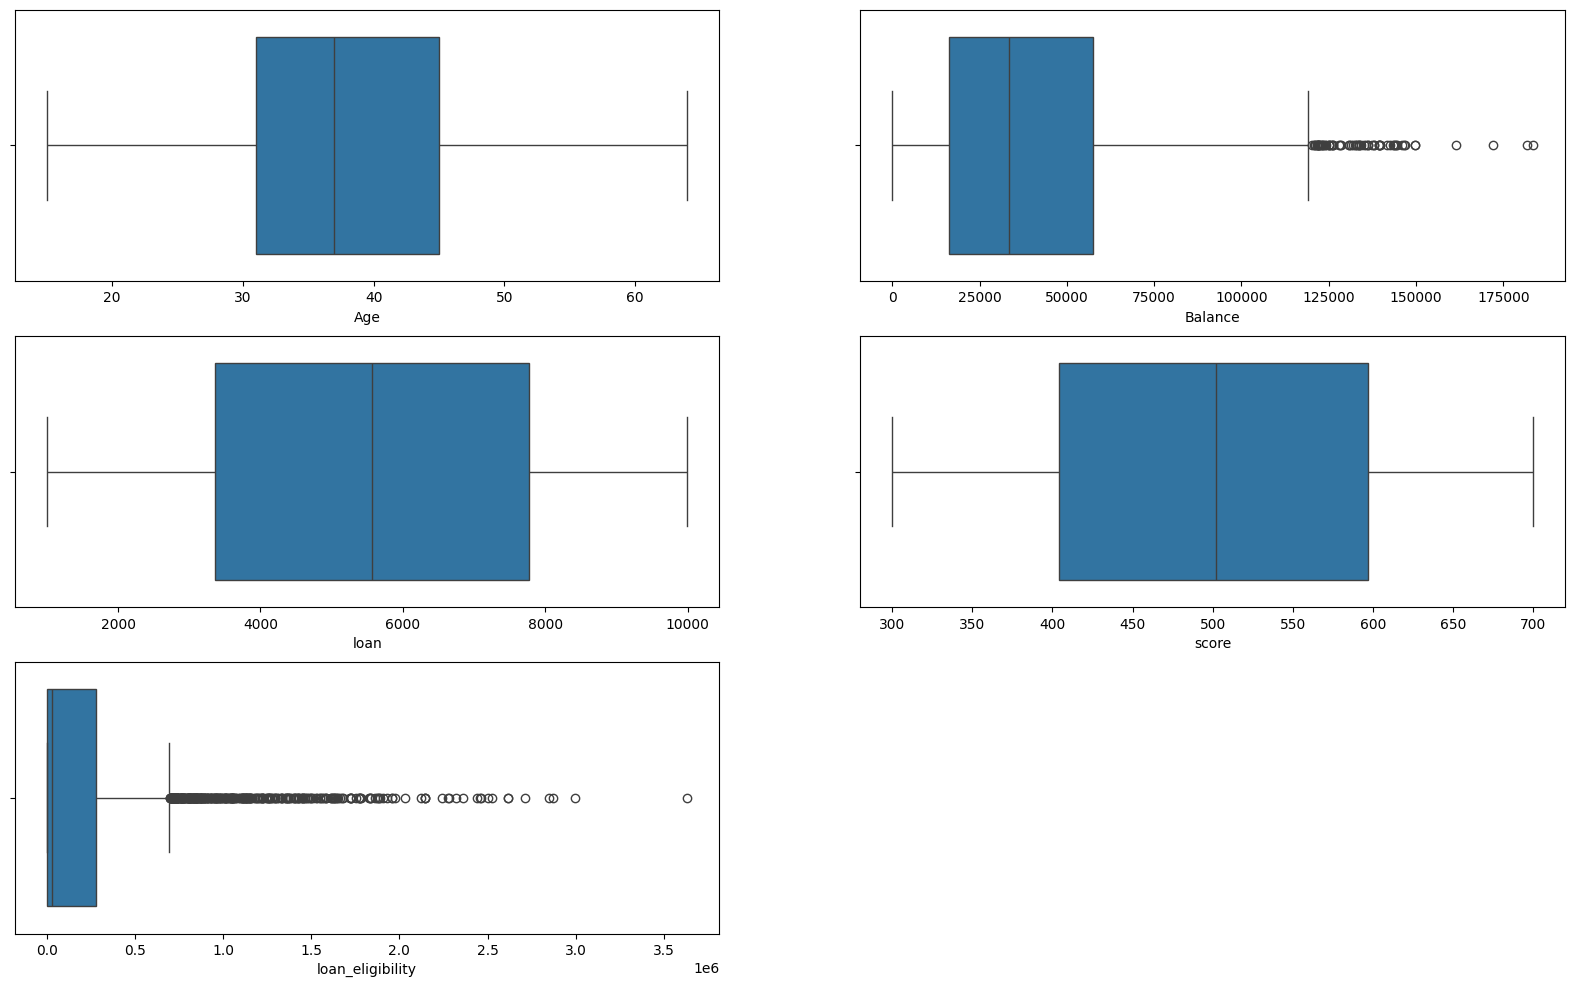

In [361]:
#I am doing univariate analysis of numerical columns
plt.figure(figsize = [20,12])
plt.subplot(3,2,1)
sns.boxplot(x = 'Age',data = data)

plt.subplot(3,2,2)
sns.boxplot(x = 'Balance',data = data)

plt.subplot(3,2,3)
sns.boxplot(x = 'loan',data = data)

plt.subplot(3,2,4)
sns.boxplot(x = 'score',data = data)

plt.subplot(3,2,5)
sns.boxplot(x = 'loan_eligibility',data = data)

Here clearly we can see that two features i.e balance and loan eligibility having outliers. so i am going to fix it.

**Balance**

In [362]:
data['Balance'] = np.log(data['Balance'])

<Axes: xlabel='Balance'>

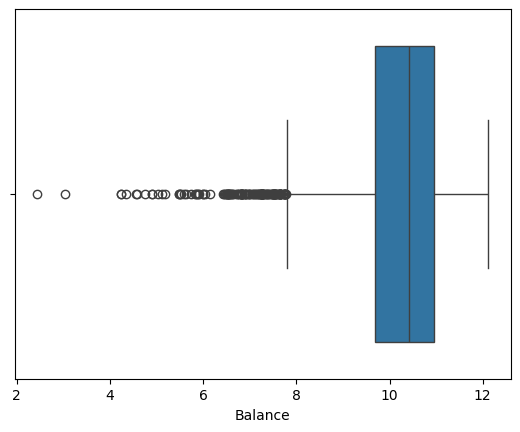

In [363]:
sns.boxplot(x = 'Balance',data = data)

In [364]:
#data.describe()

In [365]:
quan25 = data['Balance'].quantile(0.25)
quan75 = data['Balance'].quantile(0.75)
iqr = quan75 - quan25
lower_fence = quan25 - 1.5 * iqr
upper_fence = quan75 + 1.5 * iqr

In [366]:
print(lower_fence,upper_fence)

7.77862607315799 12.869032564693942


In [367]:
data = data[(data['Balance'] > lower_fence) & (data['Balance'] < upper_fence) ]

<Axes: xlabel='Balance'>

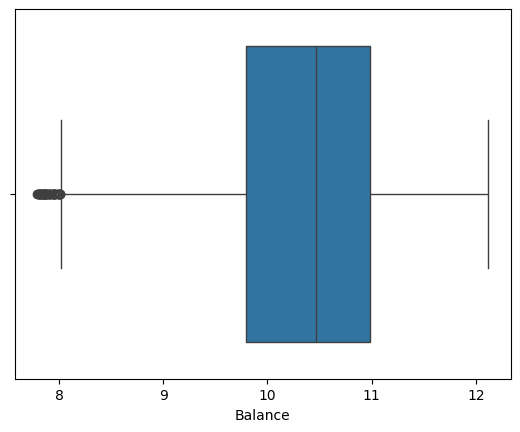

In [368]:
sns.boxplot(x = 'Balance',data = data)

**loan_eligibility**

In [369]:
quan25 = data['loan_eligibility'].quantile(0.25)
quan75 = data['loan_eligibility'].quantile(0.75)
iqr = quan75 - quan25
lower_fence = quan25 - 1.5 * iqr
upper_fence = quan75 + 1.5 * iqr

In [370]:
print(lower_fence,upper_fence)

-436926.375 728210.625


In [371]:
data = data[(data['loan_eligibility'] > lower_fence) & (data['loan_eligibility'] < upper_fence) ]

In [372]:
data.shape

(3571, 10)

<Axes: xlabel='loan_eligibility'>

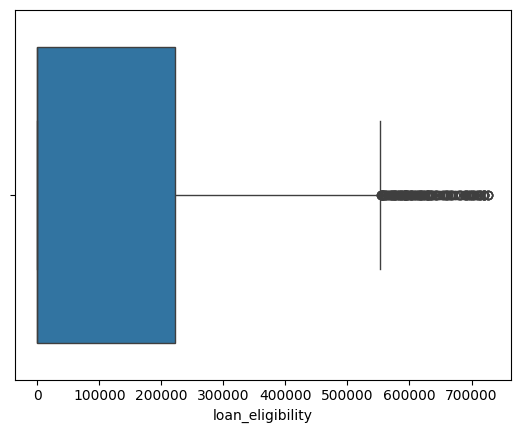

In [373]:
sns.boxplot(x = 'loan_eligibility',data = data)

In [374]:
data['loan_eligibility'] = np.log(data['loan_eligibility'] + 1)

<Axes: xlabel='loan_eligibility'>

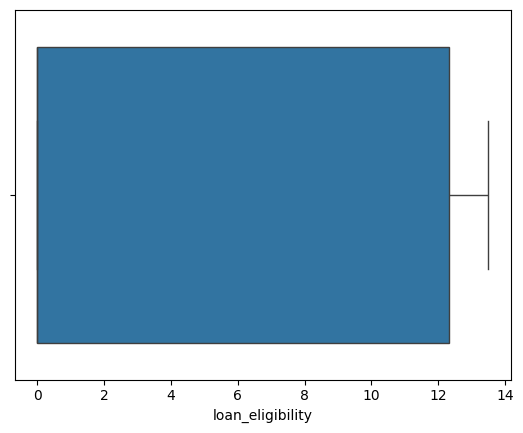

In [375]:
sns.boxplot(x = 'loan_eligibility',data = data)

In [376]:
data.head()

,Customer ID,Gender,Age,Region,Job Classification,Date Joined,Balance,loan,score,loan_eligibility
1,400000002,Female,34,Northern Ireland,Blue Collar,06.Jan.15,10.516501,8907.0,697.0,0.000000
4,100000005,Female,38,England,Blue Collar,09.Jan.15,10.481218,2586.0,405.0,12.090662
5,300000006,Female,30,Wales,Blue Collar,09.Jan.15,11.715407,5433.0,483.0,0.000000
6,100000007,Female,34,England,Blue Collar,11.Jan.15,10.666157,2644.0,467.0,12.275600
7,200000008,Female,48,Scotland,Other,11.Jan.15,10.509992,7824.0,314.0,0.000000


In [377]:
#checking for null values
data.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Region                0
Job Classification    0
Date Joined           0
Balance               0
loan                  0
score                 0
loan_eligibility      0
dtype: int64

# Encoding catagorical variable

In [378]:
#Firstly i have converted the date joined column into datetime column which is before in string dtype
data['Date Joined'] = pd.to_datetime(data['Date Joined'])
data['day'] = data['Date Joined'].dt.day
data['month'] = data['Date Joined'].dt.month
data['year'] = data['Date Joined'].dt.year

<ipython-input-378-122955af2996>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date Joined'] = pd.to_datetime(data['Date Joined'])


In [379]:
data.head()

,Customer ID,Gender,Age,Region,Job Classification,Date Joined,Balance,loan,score,loan_eligibility,day,month,year
1,400000002,Female,34,Northern Ireland,Blue Collar,2015-01-06,10.516501,8907.0,697.0,0.000000,6,1,2015
4,100000005,Female,38,England,Blue Collar,2015-01-09,10.481218,2586.0,405.0,12.090662,9,1,2015
5,300000006,Female,30,Wales,Blue Collar,2015-01-09,11.715407,5433.0,483.0,0.000000,9,1,2015
6,100000007,Female,34,England,Blue Collar,2015-01-11,10.666157,2644.0,467.0,12.275600,11,1,2015
7,200000008,Female,48,Scotland,Other,2015-01-11,10.509992,7824.0,314.0,0.000000,11,1,2015


In [380]:
data.drop('Date Joined',axis = 1,inplace = True)

In [381]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [382]:
#I am going to apply label encoding to all of categorical variable
data['Gender'] = encoder.fit_transform(data['Gender'])
data['Region'] = encoder.fit_transform(data['Region'])
data['Job Classification'] = encoder.fit_transform(data['Job Classification'])

In [383]:
data.head()

,Customer ID,Gender,Age,Region,Job Classification,Balance,loan,score,loan_eligibility,day,month,year
1,400000002,0,34,1,0,10.516501,8907.0,697.0,0.000000,6,1,2015
4,100000005,0,38,0,0,10.481218,2586.0,405.0,12.090662,9,1,2015
5,300000006,0,30,3,0,11.715407,5433.0,483.0,0.000000,9,1,2015
6,100000007,0,34,0,0,10.666157,2644.0,467.0,12.275600,11,1,2015
7,200000008,0,48,2,1,10.509992,7824.0,314.0,0.000000,11,1,2015


# Split Data into Dependent Features and Independent Features

In [384]:
X = data.drop('loan_eligibility',axis = 1)
y = data['loan_eligibility']

In [385]:
print(X.shape,y.shape)

(3571, 11) (3571,)


# Train Test Split

In [386]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=42)

In [387]:
print(X_train.shape,X_test.shape)

(2678, 11) (893, 11)


# Feature Scaling

In [388]:
#Now iam going to do standadize to all the columns.
from sklearn.preprocessing import StandardScaler

In [389]:
standardize = StandardScaler()

In [390]:
X_train = standardize.fit_transform(X_train)
X_test = standardize.transform(X_test)

In [391]:
print(X_train)

[[ 1.36106823  0.90719835  0.10008194 ... -0.29147408 -1.29600051
   0.        ]
 [-0.85268566 -1.10229477 -0.7014715  ...  0.39970147  0.59476511
   0.        ]
 [-0.852686   -1.10229477 -0.10030642 ...  0.16930962  0.59476511
   0.        ]
 ...
 [ 0.25418423 -1.10229477  2.00377135 ...  0.5148974  -0.91784739
   0.        ]
 [-0.85267195  0.90719835  0.40066448 ...  1.09087703  1.35107135
   0.        ]
 [-0.85267608 -1.10229477 -1.70341329 ... -1.21304149  1.35107135
   0.        ]]


In [392]:
print(X_test)

[[ 2.46795766 -1.10229477 -0.2005006  ... -0.17627816 -1.29600051
   0.        ]
 [-0.85269505 -1.10229477 -0.40088896 ...  1.66685666 -0.16154114
   0.        ]
 [-0.8527112   0.90719835 -0.40088896 ... -1.09784556 -1.29600051
   0.        ]
 ...
 [-0.85267532 -1.10229477 -1.30263657 ... -0.75225779  1.35107135
   0.        ]
 [-0.8526767   0.90719835 -0.60127732 ... -1.55862927  1.35107135
   0.        ]
 [ 1.36106748  0.90719835 -1.50302493 ... -0.86745371 -1.29600051
   0.        ]]


# Fittng Linear Regression Model

In [393]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()

In [394]:
lin_model.fit(X_train,y_train)

LinearRegression()

In [395]:
y_pred_lin_model = lin_model.predict(X_test)

# Testing Score

In [397]:
lin_model.score(X_test,y_test)

0.9381528407074373

# Training Score

In [398]:
lin_model.score(X_train,y_train)

0.936207330947845

And my traing score is 0.936207330947845 which is closely approximate to testing score which is good model,

In [399]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test,y_pred_lin_model)

0.9381528407074373

In [400]:
r2_score,mean_squared_error(y_test,y_pred_lin_model)

(<function sklearn.metrics._regression.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', force_finite=True)>,
 2.314795879919252)

# Fitting Decision Tree Regressor


In [412]:
from sklearn.tree import DecisionTreeRegressor
model_dt = DecisionTreeRegressor(max_depth=3)

In [413]:
model_dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [414]:
y_pred_dt = model_dt.predict(X_test)

# Training Score

In [415]:
model_dt.score(X_train,y_train)

0.9967232320596957

# Testing Score

In [416]:
model_dt.score(X_test,y_test)

0.9962121594101573

# Fitting with Random Forest Regressor

In [418]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=50)

In [419]:
model_rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=50)

# Training Score

In [420]:
model_rf.score(X_train,y_train)

0.9999976723875494

# testing Score

In [421]:
model_rf.score(X_test,y_test)

0.9999683852424519